## 1. 데이터셋 로드

In [1]:
import os 

HOUSING_PATH = 'datasets/housing'

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.20,33.94,42.0,618.0,163.0,680.0,179.0,3.3472,154200.0,<1H OCEAN
1,-122.03,37.62,32.0,2964.0,547.0,1472.0,527.0,4.2468,221200.0,NEAR BAY
2,-122.19,37.82,32.0,1835.0,264.0,635.0,263.0,8.3170,365900.0,NEAR BAY
3,-118.00,33.77,24.0,1324.0,267.0,687.0,264.0,3.4327,192800.0,<1H OCEAN
4,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,218300.0,<1H OCEAN
5,-120.46,37.31,26.0,3170.0,572.0,1524.0,565.0,3.4800,95300.0,INLAND
6,-118.40,34.24,35.0,2552.0,545.0,1850.0,503.0,4.7750,179500.0,<1H OCEAN
7,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,INLAND
8,-121.93,37.72,26.0,2806.0,459.0,1453.0,444.0,4.9107,213800.0,<1H OCEAN
9,-121.18,39.23,8.0,2112.0,360.0,782.0,344.0,3.7125,175000.0,INLAND


## 2. 데이터 분리 및 이해하기

In [4]:
# longitude: 경도 
# latitude: 위도
# housing_median_age: 중간 노후연식
# total_rooms: 방 개수
# total_bedrooms: 침실 개수
# population: 인구
# households: 새대
# median_income: 중간 수입
# median_house_value: 중간 집 값
# ocean_proximity: 해변 근접

### 2-1. 

In [5]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# info: 간략한 정보 (전체 행 수, na값 개수 등)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# value_counts: 시리즈 value의 Counts를 확인 
# 범주형 contents
housing['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# describe: 수치형 특성 요약 정보
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2-2. 데이터 형태 히스토그램 그리기

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
housing.hist(bins=50, figsize=(15, 10)) # histogram 그리기
plt.show()

## 3. 테스트 세트 만들기

### 3-1. 무작위 샘플링

In [18]:
import numpy as np

np.random.seed(42) # 항상 같은 테스트 셋이 나오도록

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # 인덱스 셔플 (0~data의 길이만큼 random하게)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] # test_set_size까지. random 배열을 가져옴.
    train_indices = shuffled_indices[test_set_size:] # 나머지.
    return data.iloc[train_indices], data.iloc[test_indices]


##### 주의사항: 데이터를 더 깊게 들여다보기 전에 테스트 세트를 따로 떼어놓아야 함. (뇌가 오버피팅 되어 특정 모델을 선택하는 것을 막자.)

In [20]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), 'train +', len(test_set), 'test')


16512 train + 4128 test


#### 순수 무작위 샘플링 - (데이터셋이 충분히 크면 괜찮지만, 샘플링 편향 위험성)  => 계층적 샘플링이 필요

### 3-2. 층화추출법 (계층적 샘플링)

##### 계층적 샘플링: 테스트세트가 전체 모집단을 대표하도록 샘플링. (예. 남여 비율이 52:48 이라면 테스트셋도 마찬가지 비율로)

##### median_income을 기준으로 샘플링.  => income_cat이라는 컬럼으로

In [24]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
# 계층적 샘플링을 위한 income_cat
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)  # income의 카테고리 수 제한

# where절 사용법: 
# where(cond, other, inplace): cond가 True => 원래값 유지, cond가 False면 other로 설정 함. inplace가 True면 중복값 덮어쓰기.
housing['income_cat'].where(housing['income_cat'] < 6, 6.0, inplace=True) # 6보다 큰 카테고리는 6로 합치자. (소득 카테고리를 나눔)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-118.20,33.94,42.0,618.0,163.0,680.0,179.0,3.3472,154200.0,<1H OCEAN,3.0
1,-122.03,37.62,32.0,2964.0,547.0,1472.0,527.0,4.2468,221200.0,NEAR BAY,3.0
2,-122.19,37.82,32.0,1835.0,264.0,635.0,263.0,8.3170,365900.0,NEAR BAY,6.0
3,-118.00,33.77,24.0,1324.0,267.0,687.0,264.0,3.4327,192800.0,<1H OCEAN,3.0
4,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,218300.0,<1H OCEAN,3.0
5,-120.46,37.31,26.0,3170.0,572.0,1524.0,565.0,3.4800,95300.0,INLAND,3.0
6,-118.40,34.24,35.0,2552.0,545.0,1850.0,503.0,4.7750,179500.0,<1H OCEAN,4.0
7,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,INLAND,2.0
8,-121.93,37.72,26.0,2806.0,459.0,1453.0,444.0,4.9107,213800.0,<1H OCEAN,4.0
9,-121.18,39.23,8.0,2112.0,360.0,782.0,344.0,3.7125,175000.0,INLAND,3.0


In [26]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64

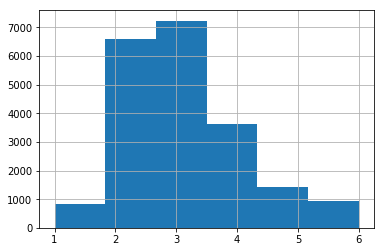

In [27]:
housing['income_cat'].hist(bins=6)

### 계층 샘플링 - sklearn-> StratifiedShuffleSplit

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
# StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# split.split => generator
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]


#### 비율 비교

In [32]:
original_strat_ratio = housing['income_cat'].value_counts() / len(housing)
print("모집단 비율")
print(original_strat_ratio)

print("\n 테스트 비율")
test_strat_ratio = strat_test_set['income_cat'].value_counts()/len(strat_test_set)
print(test_strat_ratio)

print("\n 층화추출법: 모집단 비율 - 샘플링 비율")
print(abs(original_strat_ratio - test_strat_ratio))

모집단 비율
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64

 테스트 비율
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.069041
6.0    0.045543
1.0    0.039729
Name: income_cat, dtype: float64

 층화추출법: 모집단 비율 - 샘플링 비율
3.0    0.000048
2.0    0.000048
4.0    0.000048
5.0    0.000097
6.0    0.000048
1.0    0.000097
Name: income_cat, dtype: float64


In [33]:
# 만약 무작위 샘플링이라면
shuffle_test = split_train_test(housing, 0.2)[1]

o_shuffle_ratio = housing['income_cat'].value_counts() / len(housing)
print("모집단 비율")
print(o_shuffle_ratio)
print()

t_shuffle_ratio = shuffle_test['income_cat'].value_counts()/len(shuffle_test)
print("\n 테스트 비율")
print(t_shuffle_ratio)

print()
print("\n 무작위 추출법: 모집단 비율 - 샘플링 비율")
print(abs(o_shuffle_ratio-t_shuffle_ratio))

모집단 비율
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.068944
6.0    0.045494
1.0    0.039826
Name: income_cat, dtype: float64


 테스트 비율
3.0    0.338421
2.0    0.315649
4.0    0.180717
5.0    0.071463
6.0    0.048934
1.0    0.044816
Name: income_cat, dtype: float64


 무작위 추출법: 모집단 비율 - 샘플링 비율
3.0    0.012161
2.0    0.003198
4.0    0.004409
5.0    0.002519
6.0    0.003440
1.0    0.004990
Name: income_cat, dtype: float64


In [34]:
# income cat 삭제. (표본 나눴으니.)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 4. 데이터 이해를 위한 탐색과 시각화

In [35]:
housing = strat_train_set.copy() # 훈련 셋 손상시키지 않기 위한 복사본

### 4-1. 위치데이터 시각화

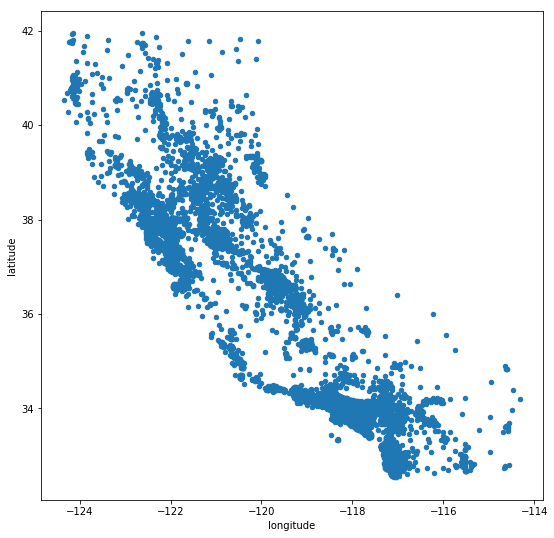

In [37]:
import matplotlib.image as mpimg

housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9, 9))
housing_plot.set_xlabel('longitude')
housing_plot.set_ylabel('latitude')
plt.show()


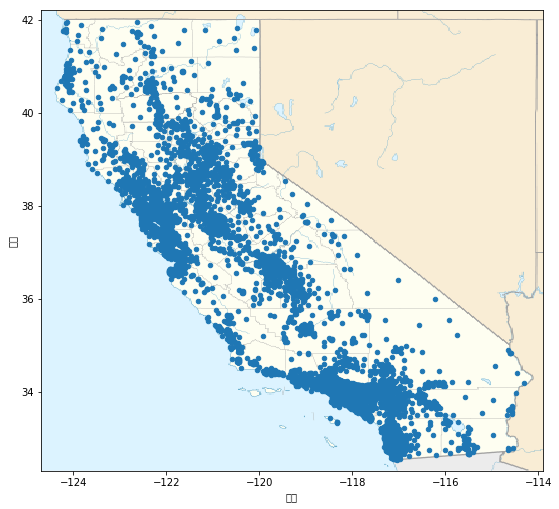

In [38]:
# 지도 출처: https://upload.wikimedia.org/wikipedia/commons/archive/f/f9/20090605191745%21USA_California_location_map.svg
map_img = mpimg.imread('datasets/housing/califonia.png')

housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9, 9))
housing_plot.set_xlabel('경도')
housing_plot.set_ylabel('위도')
plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)

##### 밀집도 추가

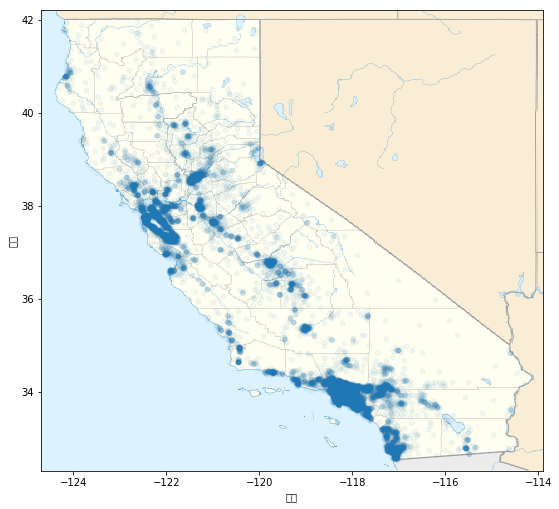

In [41]:
housing_plot = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.05, figsize=(9, 9))
housing_plot.set_xlabel('경도')
housing_plot.set_ylabel('위도')
plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)

plt.show()

### 데이터 추가하기(집 가격, 인구수)

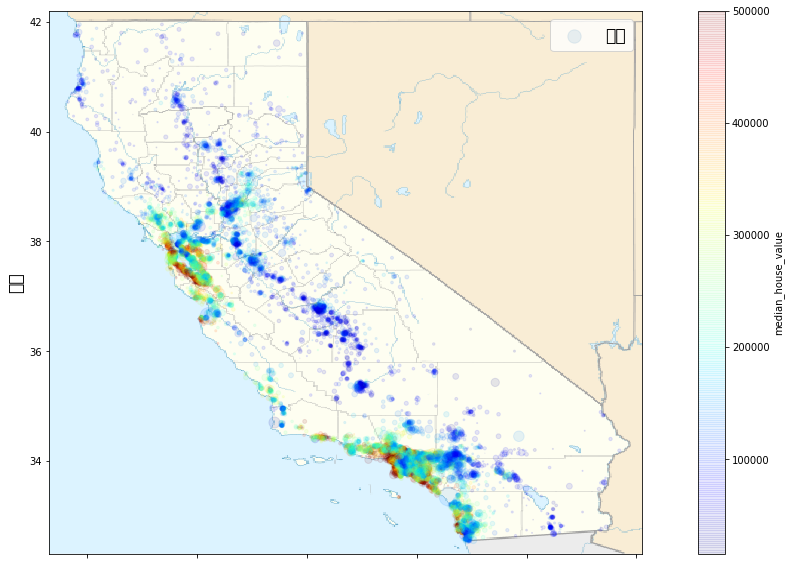

In [42]:
from matplotlib import pyplot  as plt


housing_plot = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
                            s=housing['population']/100, c="median_house_value", 
                            cmap=plt.get_cmap("jet"), colorbar=True,  figsize=(20,10))

housing_plot.set_xlabel('경도', fontsize='xx-large')
housing_plot.set_ylabel('위도', fontsize='xx-large')
plt.imshow(map_img, extent=[-124.7, -113.9, 32.3, 42.2], alpha=0.6)


plt.legend(('인구',), fontsize='xx-large')

### 4-2. 상관관계 조사

#### 표준 상관계수: Standard correlation coefficient - 피어슨 r (corr())

In [43]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924365,-0.107864,0.047274,0.072748,0.100733,0.057840,-0.016806,-0.049917
latitude,-0.924365,1.000000,0.011883,-0.039987,-0.071173,-0.110001,-0.074106,-0.078381,-0.140308
housing_median_age,-0.107864,0.011883,1.000000,-0.358407,-0.317301,-0.291963,-0.300497,-0.122754,0.105723
total_rooms,0.047274,-0.039987,-0.358407,1.000000,0.929415,0.852236,0.917652,0.199203,0.132813
total_bedrooms,0.072748,-0.071173,-0.317301,0.929415,1.000000,0.874291,0.979807,-0.010036,0.045115
population,0.100733,-0.110001,-0.291963,0.852236,0.874291,1.000000,0.903771,0.003096,-0.027344
households,0.057840,-0.074106,-0.300497,0.917652,0.979807,0.903771,1.000000,0.010508,0.061870
median_income,-0.016806,-0.078381,-0.122754,0.199203,-0.010036,0.003096,0.010508,1.000000,0.687408
median_house_value,-0.049917,-0.140308,0.105723,0.132813,0.045115,-0.027344,0.061870,0.687408,1.000000


In [44]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687408
total_rooms           0.132813
housing_median_age    0.105723
households            0.061870
total_bedrooms        0.045115
population           -0.027344
longitude            -0.049917
latitude             -0.140308
Name: median_house_value, dtype: float64

In [45]:
attributes = ['housing_median_age', "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
corr_matrix[attributes]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,-0.107864,0.047274,0.072748,0.100733,0.057840,-0.016806,-0.049917
latitude,0.011883,-0.039987,-0.071173,-0.110001,-0.074106,-0.078381,-0.140308
housing_median_age,1.000000,-0.358407,-0.317301,-0.291963,-0.300497,-0.122754,0.105723
total_rooms,-0.358407,1.000000,0.929415,0.852236,0.917652,0.199203,0.132813
total_bedrooms,-0.317301,0.929415,1.000000,0.874291,0.979807,-0.010036,0.045115
population,-0.291963,0.852236,0.874291,1.000000,0.903771,0.003096,-0.027344
households,-0.300497,0.917652,0.979807,0.903771,1.000000,0.010508,0.061870
median_income,-0.122754,0.199203,-0.010036,0.003096,0.010508,1.000000,0.687408
median_house_value,0.105723,0.132813,0.045115,-0.027344,0.061870,0.687408,1.000000


In [ ]:
%matplotlib inline

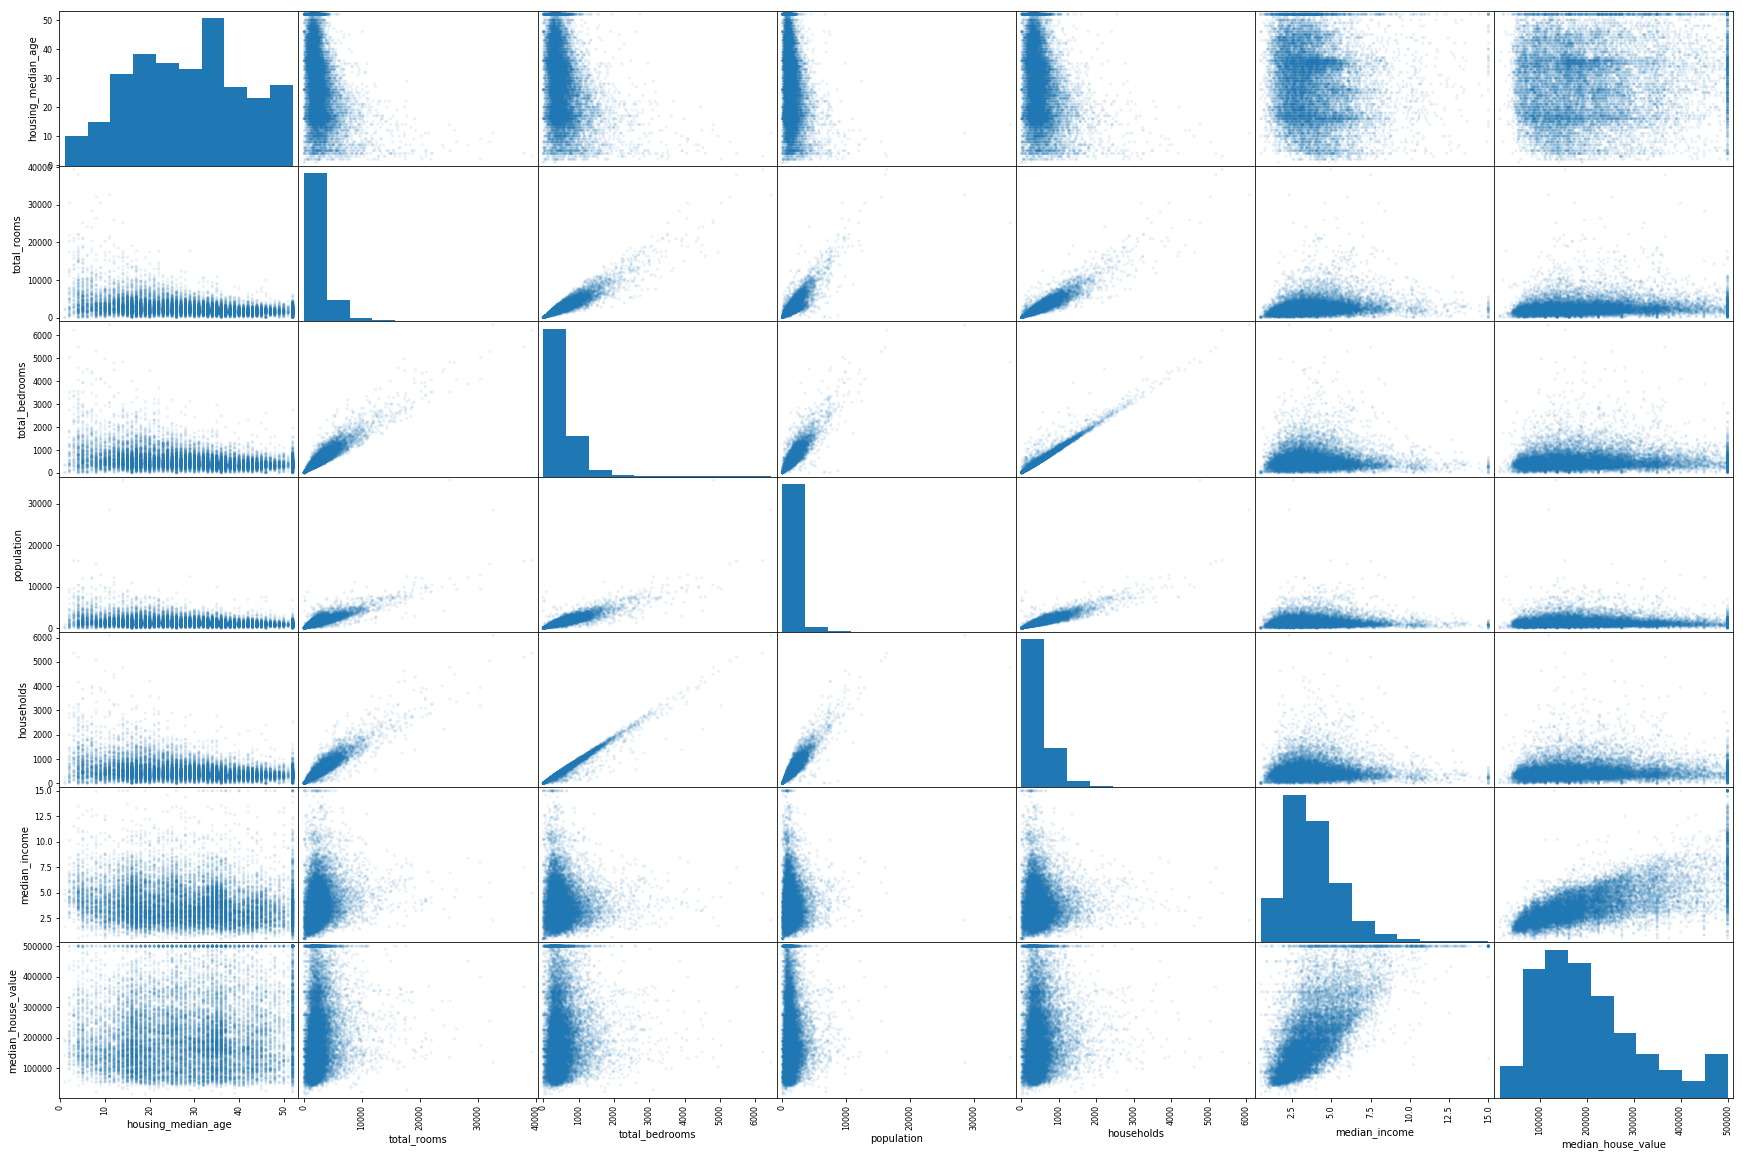

In [47]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[attributes], figsize=(30, 20), alpha=0.1)
plt.show()


In [48]:
# median_income 과 median_house_value가 상관관계

### 4-3. 특성 조합

In [ ]:
housing['rooms_per_houshold'] = housing['total_rooms']/housing['households'] # 가구당 방 개수
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms'] # 전체 방당 침실개수
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['households'] # 가구당 침실개수
housing['population_per_household'] = housing['population']/housing['households'] # 평균 한 가구 인원

In [49]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

# 추가 특성
# rooms_per_houshold , bedrooms_per_room 가 다른 특성보다 상관관계가 높은편!

median_house_value    1.000000
median_income         0.687408
total_rooms           0.132813
housing_median_age    0.105723
households            0.061870
total_bedrooms        0.045115
population           -0.027344
longitude            -0.049917
latitude             -0.140308
Name: median_house_value, dtype: float64

## 5. 데이터처리 - 머신러닝 알고리즘 위한 데이터 준비

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
# housing복사본 만듬 -> 예측 변수만 분리

In [ ]:
housing.info()

### 5-0. 데이터 이해하기

In [ ]:
# boxplot
plt.figure(1)
box_plot_attr = ['longitude', 'latitude', 'housing_median_age', 'median_income']
housing.boxplot(box_plot_attr, figsize=(9,9))

plt.figure(2)
box_plot_attr2 = ['total_rooms', 'total_bedrooms', 'population']
housing.boxplot(box_plot_attr2, figsize=(9,9))


In [ ]:
corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm')


###  5-1. 결측값 처리

##### 5-1-1. 삭제

In [ ]:
# 삭제
# housing.dropna(subset=['total_bedrooms']) 
housing.dropna().info()

In [ ]:
# 열 제거
housing.drop('total_bedrooms', axis=1).info()

##### 5-1-2. 대표값으로 대체

In [ ]:
# 대표값으로 대체

# median = housing['total_bedrooms'].median() # option3: 중간값 채우기
# housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)
# housing.info()
median = housing.median()
# print(housing.fillna(median).describe())
housing.fillna(median).info()


# housing.info()
# 중간값 계산할 경우. 저장해 놓아야함( 테스트셋에서도 누락된 값을 바꾸고, 실제 운영시에도 바꿔야 함.

##### 5-1-2. 부록: imputer 사용하기

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer

In [ ]:
# imputer 사용하기: 수치형 특성에서만 계산될 수 있음.
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

In [ ]:
# imputer의 statistics에 저장됨.! (새로운 데이터에서 어떤 값이 누락될지 모르므로, 모든 수치형 특성에 imputer를 적용하자)
imputer.statistics_

In [ ]:
housing_num.median().values

In [ ]:
#imputer 객체로 훈련세트에서 누락된 값을 학습한 중간값으로 변경 
X = imputer.transform(housing_num)
X
# => 결과는 numpy 배열 (housing_num에서 변형된 특성) => pandas로 만들기

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))
housing_tr.head(10)

##### 5-1-3. 예측값 삽입 (Feature를 위한 머신러닝)

In [ ]:
housing.describe()

### 5-2. 텍스트와 범주형 특성 다루기

##### 5-2-1. LabelEncoding 예시

In [ ]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

In [ ]:
housing['ocean_proximity'].value_counts()

In [ ]:
# 머신러닝 알고리즘은 대부분 숫자형을 다룸 -> 각 카테고리를 다른 정숫값으로 매핑
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]


In [ ]:
housing_categories


##### 5-2-2. OnehotEncoding 예시

In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot.toarray()

### 5-3. feature scaling

In [ ]:
# 스케일링을 비슷하게 만들어준다. (0~1사이에 위치하도록)
# 1. min-max 스케일링: (data-min_value)/(max_value-min_value) 
# MinMaxScaler변환기

# 2. 표준화: (data-mean)/std ==> 분산이 1이 됨: 평균이 0이 됨
# StandardScaler 변환기
# 범위의 상한과 하한이 없어서 신경망에서는 사용 못함.
# 그러나 표준화는 이상치에 영향을 덜 받음.

# 만약 중간소득을 실수로 100이라고 입력한 구역이 있으면,,,, 
# min-max는 0~15사이에 모든 값을 0~0.15로 만듬
# 표준화는 크게 영향 받지 않음(평균으로 하기 때문에.)

housing.describe()

##### 5-3-1. min-max scaling (min-max normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

A = MinMaxScaler().fit_transform(housing.drop('ocean_proximity',axis=1))
min_max_columns = housing.columns.copy().drop('ocean_proximity')

min_max_housing = pd.DataFrame(A, columns=min_max_columns, index=housing.index)

min_max_housing.describe()


##### 5-3-2. Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

B = StandardScaler().fit_transform(housing.drop('ocean_proximity',axis=1))
std_columns = housing.columns.copy().drop('ocean_proximity')

std_housing = pd.DataFrame(B, columns=std_columns, index=housing.index)

std_housing.describe()


### 5-4. 변환 파이프라인

##### 5-4-1. 변환기 만들기

In [ ]:
# 변환기 만들기
# fit과 transform
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx]/X[:, household_idx]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

# 모든 파이프라인은 (이름, 추정기)
# 마지막 단계에서는 반드시 fit_transform()메소드를 가지고 있어야 함
# 파이프라인이 하나씩 호출하면서 출력을 다음 단계의 입력으로 전달함.

##### 데이터프레임 셀렉터 클래스 - 파이프라인 처리하기

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    데이터프레임에서 필요한 속성만 셀렉트하도록
    """
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

##### 5-4.2 파이프라인 연결하기

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder',  OneHotEncoder(categories='auto',sparse=False)),
])



In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])
full_pipeline

In [ ]:
# pipeline 실행
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

In [ ]:
housing_prepared.shape

In [ ]:
housing_prepared

## 6. 모델 선택과 훈련

우린 다음을 수행했음
1. 문제 정의
2. 데이터 읽고 탐색
3. 훈련세트와 테스트 세트 나누고
4. 머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하고 준비하기 위해 변환 파이프라인 작성
5. ---- 머신러닝 모델 선택하고 훈련하자

#### 훈련하기1 - LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

#### 훈련평가하기1 - LinearRegression

In [ ]:
some_data = housing.iloc[:10]
some_labels = housing_labels.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)
print("예측: ", lin_reg.predict(some_data_prepared))
print("레이블: ", list(some_labels))

# 그닥 정확한 예측은 아니지만. 작동은 함

In [ ]:
# 전체 MSE측정
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
# 이렇게 평가가 끝났음. => 좋은 점수가 아님. (과소적합!) 
# 이유는?: 모델이 안 좋거나, 특성들이 충분한 정보를 제공하지 못했거나.
# 해결책은?: 모델은 바꾸거나 더 좋은 특성을 주입하거나 모델의 규제를 감소시키거나

# dir(lin_reg)
# lin_reg.normalize

#### 훈련하기2 - DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

#### 훈련평가하기2 - DecisionTreeRegressor

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

## 과대적합... 
# 확신이 들기전까지는 테스트 셋 사용하지 말고, 
# 훈련은 훈련셋에 일부로, 나머지는 모델 검증에 사용

#### 훈련평가하기2-2. k-fold cross-validation (교차 검증) DecisionTree

In [ ]:
# cv개로 나눠서 10번 훈련하고 평가하는데 
# 1개는 돌아가면서 검증 세트로
# 그 외 나머지는 훈련세트로 하여
# 스코어를 정함.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

In [ ]:
tree_rmse_scores.mean()

In [ ]:
tree_rmse_scores.std()

#### 훈련평가하기1-2. k-fold cross-validation (교차 검증)  LinearRegression

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

In [ ]:
lin_rmse_scores.mean()

In [ ]:
lin_rmse_scores.std()

#### 훈련하기3 - RandomForestRegressor
- 특성을 무작위로 선택해서 많은 결정 트리를 만들고 예측을 평균냄

In [ ]:
# 앙상블 학습: 여러 다른 모델을 모아서 하나의 모델을 만드는 것
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_reg

#### 훈련평가하기3 - RandomForestRegressor

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

#### 훈련평가하기3-2. k-fold cross-validation (교차 검증)  RandomForestRegressor

In [ ]:
forest_mse_score = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

forest_rmse_score = np.sqrt(-forest_mse_score)
forest_rmse_score

In [ ]:
forest_rmse_score.mean()

# 역시 과대 적합 - 그래도 훨씬 나음

In [ ]:
forest_rmse_score.std()

##### 과대적합 해결하기: 모델 간단히 하기 or regualrization or 더 많은 data
--> 가능성 있는 2~5개의 모델을 선정하는 것이 목적

***Tip:** pickle패키지나 joblib을 사용하여 사이킷런 모델을 간단하게 저장하자.

## 8. 모델 세뷰 튜닝
가능성 있는 모델들을 추렸다고 가정. -> 세부 튜닝해야 함

###  8-1-1. 그리드 탐색
단순한 방법: 하이퍼파라미터 조합을 찾을 때까지 수동으로 하이퍼파라미터를 조정하는 것.
- sklearn.model_selection import GridSearchCV
-> 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용함.
- 비교적 적은 수의 조합을 탐구할 때 괜찮음

##### RandomForestRegressor에 대한 최적의 하이퍼파라미터 조합을 그리드 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV

# param_grid에 대한 첫번째 dict에 있는 하이퍼 파라미터의 조합을 시도,, 
# 그다음 두번째 dict에 대한 하이퍼 파라미터에 대한 조합을 시도
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}    
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


In [ ]:
# 최적의 조합
grid_search.best_params_

In [ ]:
# 최적의 추정기
grid_search.best_estimator_

In [ ]:
# cv 결과
cvres = grid_search.cv_results_
cvres

In [ ]:
# 평가 점수
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
    
# 살짝 낫쥬?

###  8-1-2. 랜덤 탐색
- 하이퍼파라미터 탐색 공간이 커지면 RandomizedSearchCV
- 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가.

장점:
1. 랜덤 탐색 1,000회 반복시 하이퍼파라미터마다 각기 다른 1,000개의 값 탐색 (그리드는 몇개의 값만 탐색)
2. 단순히 반복 횟수를 조절 -> 컴퓨팅 자원을 제어할 수 있음

###  8-3. 앙상블 방법
- 최상의 모델을 연결해보기. (결정 트리의 앙상블인 랜덤 포레스트가 결정 트리 하나보다 더 성능이 좋은 것처럼)

###  8-4. 최상의 모델과 오차 분석
- 최상의 모델을 분석하면 문제에 대한 좋은 통찰력 얻을 수 있음.
- RandomForestRegressor가 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려줌.


In [ ]:
# feature에 대한 중요도를 확인할 수 있음.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
cat_one_hot_attribs = list(housing_categories)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

# 중요도가 확연히 보이쥬?

##  8-5. 테스트 셋으로 시스템 평가하기

In [ ]:
# 테스트 셋에서 feature와 레이블을 얻은 후
# full_pipeline으로 데이터를 변환하고
# 최종 모델 평가

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse


##  9. 론칭, 모니터링, 유지보수

1. 모니터링 코드: 실시간 성능 체크 - 성능 떨어졌을시 알람
2. 시스템 예측 샘플링 및 평가 - 사람의 분석이 필요.
3. 입력 데이터 품질 평가 (시스템 입력을 모니터링 - 쓰레기가 들어가면 쓰레기가 나온다. (센서 고장 체크))
4. 새로운 데이터를 사용해 정기적으로 모델을 훈련 (자동화)